In [1]:
%pylab inline

import os
import glob
import numpy as np
import astropy.table as astTable
import matplotlib.pyplot as plt
import xlens

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
root_dir = "/work/xiangchong.li/work/hsc_s23b_sim/tests_dm_hsc_simple/truth/catalog_force/20241224T214849Z/sim_2_rot0_Coadd_anacal_joint/0/"
train_fname = "/work/xiangchong.li/superonionGW/code/image/catsim/OneDegSq.fits"
train = astTable.Table.read(train_fname)
output = astTable.Table()

In [3]:
i_hsc_m00_052 = np.zeros(len(train))
patch_dir_list = glob.glob(root_dir + "/*")
for patch in range(149):
    band_dir = os.path.join(root_dir, str(patch))
    fname = glob.glob(band_dir + "/*")[0]
    data = astTable.Table.read(fname)
    begin = patch * 5776
    end = min((patch + 1) * 5776, len(train))
    n_use = end - begin
    i_hsc_m00_052[begin: end] = data["fpfs_m00"][:n_use]

In [4]:
i_hsc_m00_052 = 27.0 - np.log10(i_hsc_m00_052) * 2.5
output["g_hsc_m00_052"] = i_hsc_m00_052 + (train["g_ab"] - train["i_ab"])
output["i_hsc_m00_052"] = i_hsc_m00_052
output["r_hsc_m00_052"] = i_hsc_m00_052 + (train["r_ab"] - train["i_ab"])
output["z_hsc_m00_052"] = i_hsc_m00_052 + (train["z_ab"] - train["i_ab"])
output["y_hsc_m00_052"] = i_hsc_m00_052 + (train["y_ab"] - train["i_ab"])

In [5]:
output

g_hsc_m00_052,i_hsc_m00_052,r_hsc_m00_052,z_hsc_m00_052,y_hsc_m00_052
float64,float64,float64,float64,float64
25.905610068385187,24.136603339285188,24.73474787058519,23.848246558285187,23.685463889285188
26.76389689740249,26.881471589202487,26.81427951160249,26.77428813280249,26.660585358702487
26.62959920965377,26.75943052375377,26.68023740845377,26.69179403385377,26.603560086053772
28.197686719413557,27.454686688813556,27.832744168713557,26.718995618313556,26.426736402013557
28.32555004459767,27.94658466679767,28.20680042609767,27.62049671509767,27.06024929389767
26.559804978402358,26.06383139140236,26.260067048102357,25.741687836702358,25.24761015420236
26.108072761544317,24.216639045644317,25.199392799344317,23.737568382244316,23.503283027644315
27.947497153225296,27.7363364934253,27.9700725316253,27.576088690725296,27.100176596625296
27.64214952156923,28.04158456496923,27.88550813366923,28.05854470896923,28.22965295486923


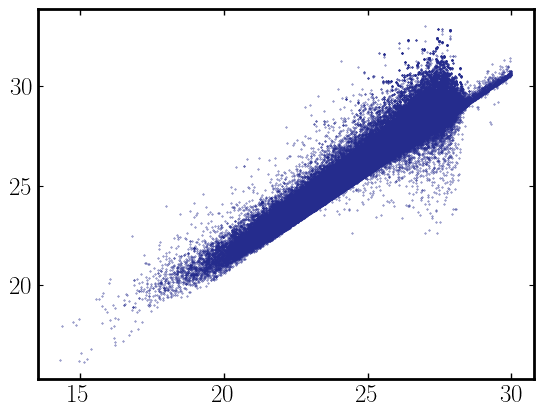

In [6]:
plt.close()
plt.scatter(
    train["i_ab"], 
    i_hsc_m00_052, 
    s=0.1,
)

In [7]:
data_test = astTable.Table.read("/work/xiangchong.li/work/hsc_s23b_sim/tests_dm_hsc_simple/truth/catalog_force/20241224T214849Z/sim_2_rot0_Coadd_anacal_force/0/0/sim_2_rot0_Coadd_anacal_force_0_0_hsc_sim_truth_catalog_force_20241224T214849Z.parq")

In [12]:
output.write("/work/xiangchong.li/superonionGW/code/image/catsim/OneDegSq_hsc_fpfs_mags.fits")